In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = 'C:\desk\Desktop\Machine_Learning\project\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
df = df[df['age'] >= 28]
df

,probe_index,name,weight_fresh,weight_at_test,size_x,size_y,size_z,age,density_fresh,density_at_test,...,id_stone,stone_type,slump,q_airentrain,q_waterproofing,q_retardant,q_superplast,q_plast,compressive_strength,slump.1
5,5,Atm_2010_0012_I,8030.0,NaN,151.5,149.6,150.0,28.0,2362.000906,0.000000,...,34.0,crushed_stone,14.0,NaN,NaN,NaN,NaN,NaN,0.000000,14.0
11,5,Atm_2010_0028_II,8050.0,NaN,151.5,149.6,150.0,28.0,2367.883847,0.000000,...,34.0,crushed_stone,16.5,NaN,NaN,NaN,NaN,NaN,0.000000,16.5
17,5,Atm_2010_0044_III,8160.0,NaN,151.5,149.6,150.0,28.0,2400.240024,0.000000,...,34.0,crushed_stone,16.5,NaN,NaN,NaN,NaN,NaN,0.000000,16.5
23,5,Atm_2010_0065_I,7840.0,7865.0,151.0,150.0,150.0,28.0,2307.579102,2314.937454,...,52.0,crushed_stone,15.5,NaN,NaN,NaN,NaN,NaN,15.426049,15.5
24,6,Atm_2010_0065_I,7910.0,7921.0,151.5,149.6,150.0,28.0,2326.703259,2329.938876,...,52.0,crushed_stone,15.5,NaN,NaN,NaN,NaN,NaN,15.800109,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,3,Vra_Zimni_0108_III,NaN,7465.0,149.5,150.0,150.0,28.0,0.000000,2219.249350,...,NaN,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,15.748495,12.0
7486,4,Vra_Zimni_0108_III,NaN,7450.0,150.0,149.6,149.6,28.0,0.000000,2219.227506,...,NaN,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,12.240642,12.0
7487,5,Vra_Zimni_0108_III,NaN,7690.0,150.0,149.8,149.8,28.0,0.000000,2284.606742,...,NaN,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,8.295060,12.0
7489,1,Vra_Zimni_0124_IV,NaN,7625.0,151.0,149.7,150.0,28.0,0.000000,2248.794867,...,NaN,crushed_stone,16.0,0.0,0.0,0.0,0.0,0.01,21.916017,16.0


In [3]:
feature_columns = df[[ 'weight_fresh', 'weight_at_test','density_fresh','density_at_test','q_cement',
                   'q_water','id_cement','sand_coarsness', 'q_crushed_sand', 'q_non_crushed_sand', 'q_ash', 
                   'id_crushed_sand', 'id_non_crushed_sand', 'id_ash', 'q_stone_1', 'q_stone_2', 'q_stone_3', 'id_stone', 
                    'q_airentrain', 'q_waterproofing', 'q_retardant', 'q_superplast', 'q_plast']]
#'probe_index', 'name','cement_label'，'q_crushed_sand', 'q_non_crushed_sand', 'q_ash','stone_type',

target_column1 = df['slump']  #'slump.1'
data1 = pd.concat([feature_columns,target_column1],axis=1)
data1_names = data1.columns.tolist()

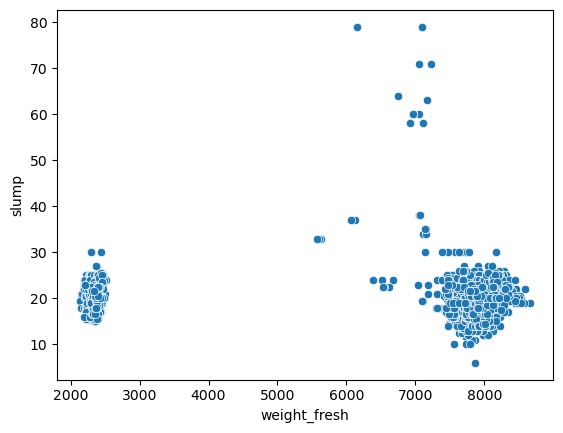

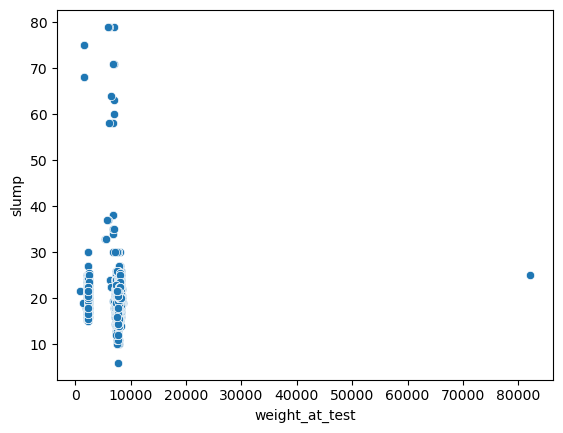

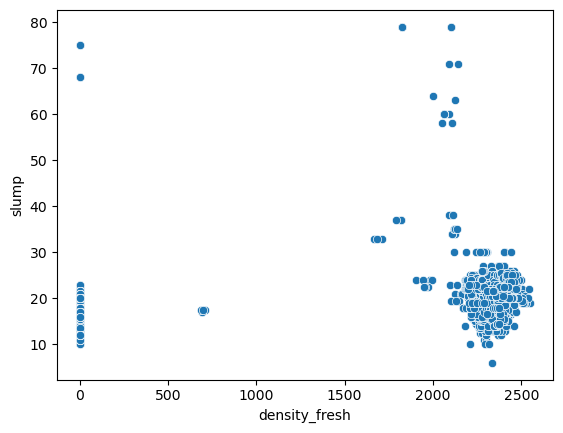

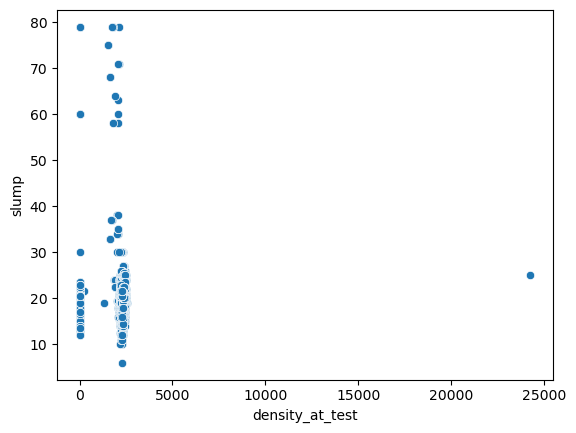

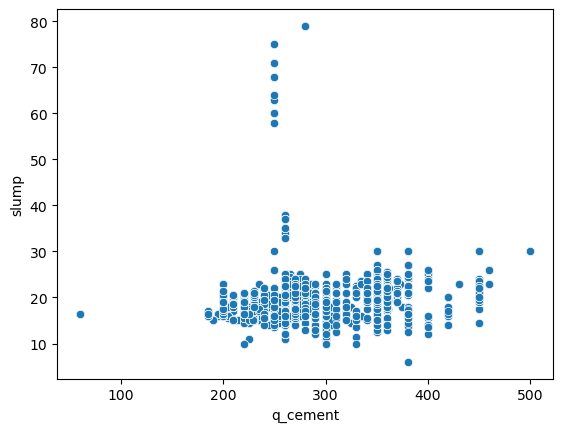

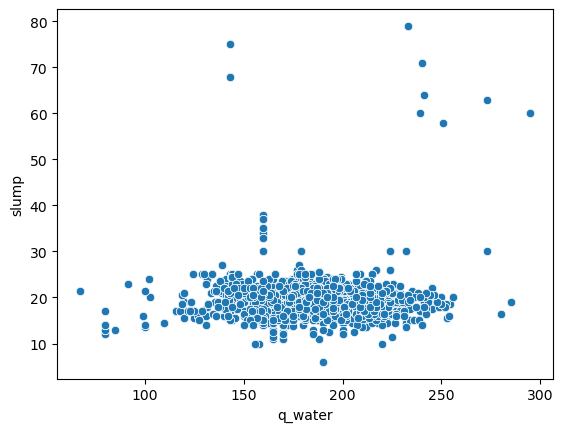

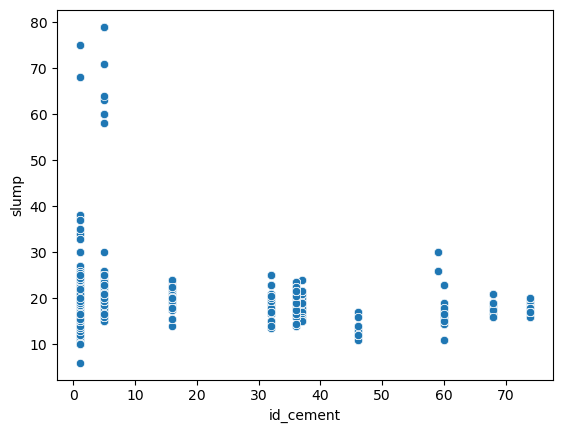

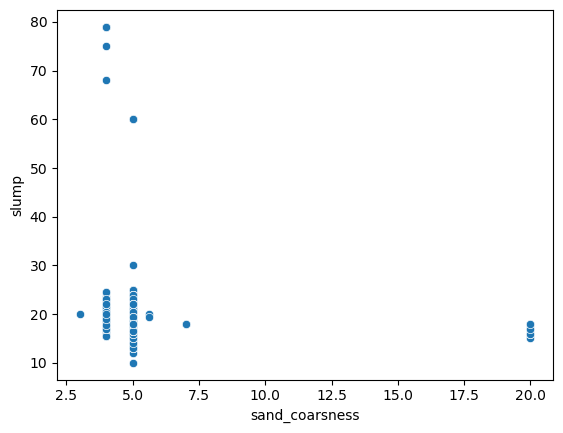

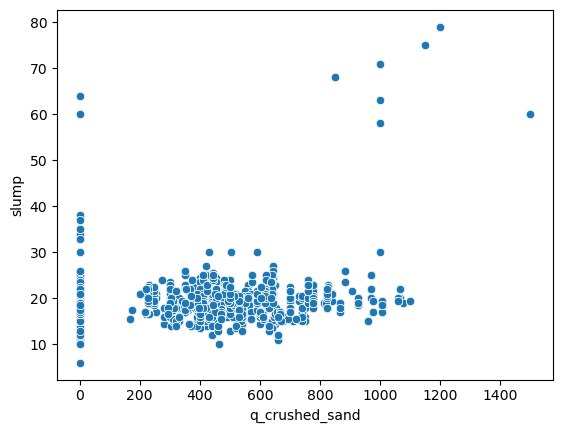

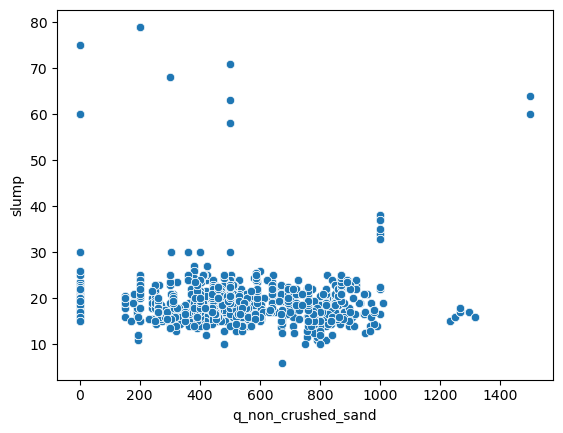

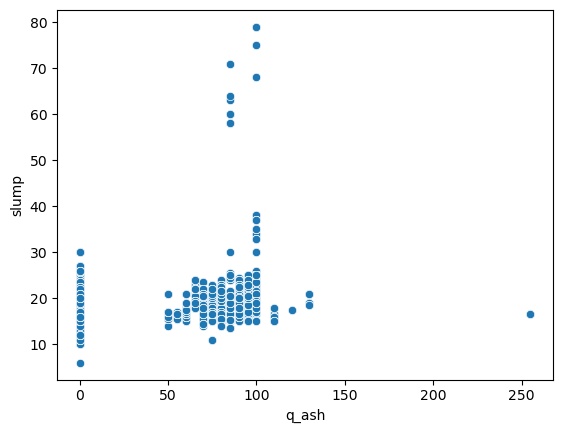

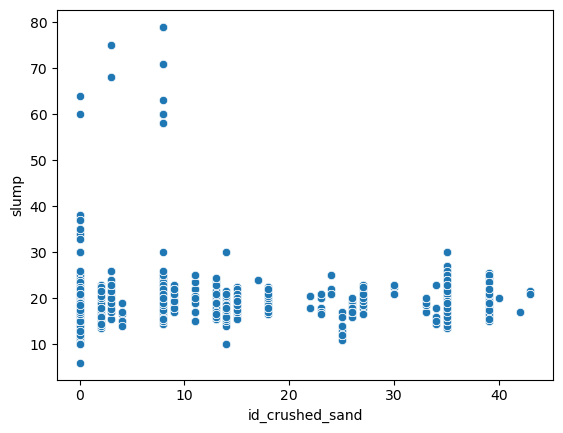

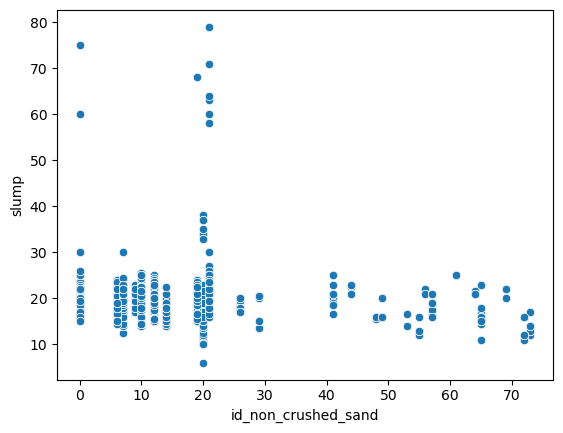

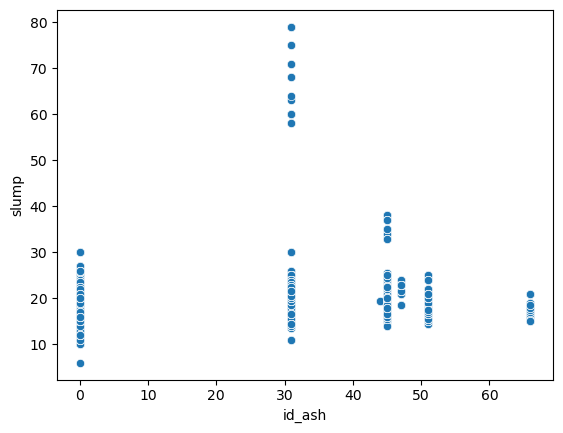

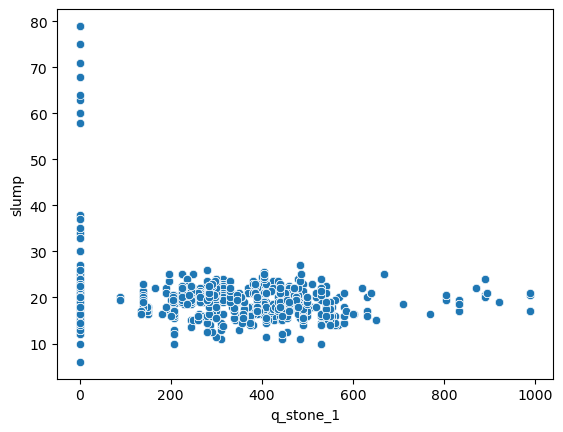

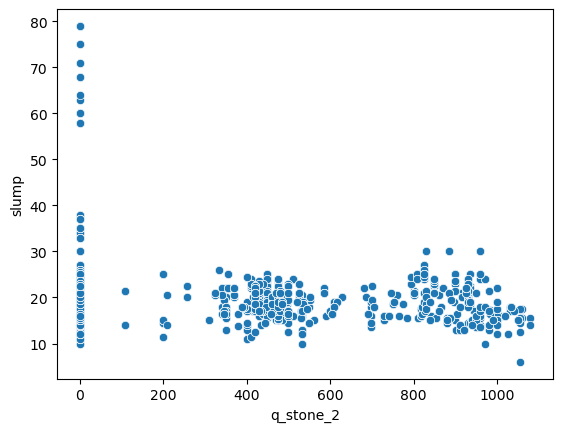

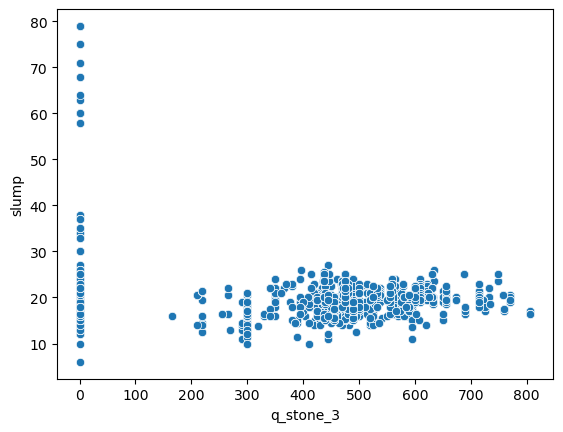

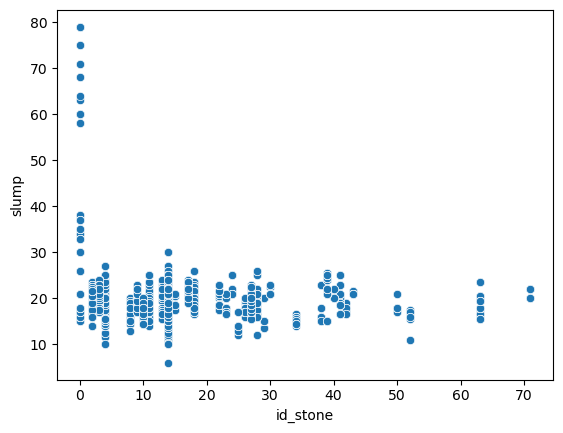

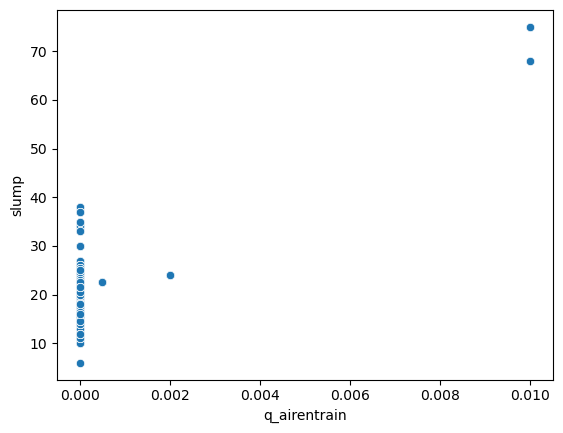

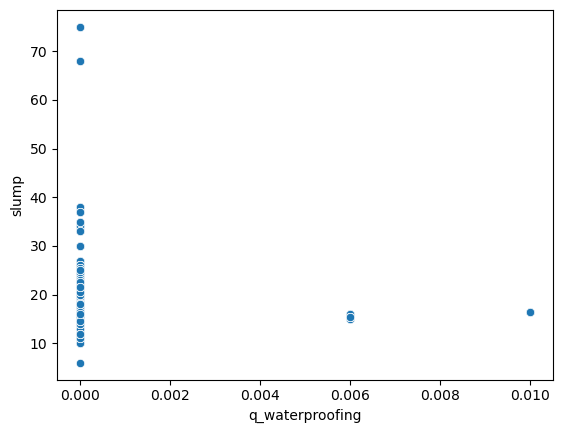

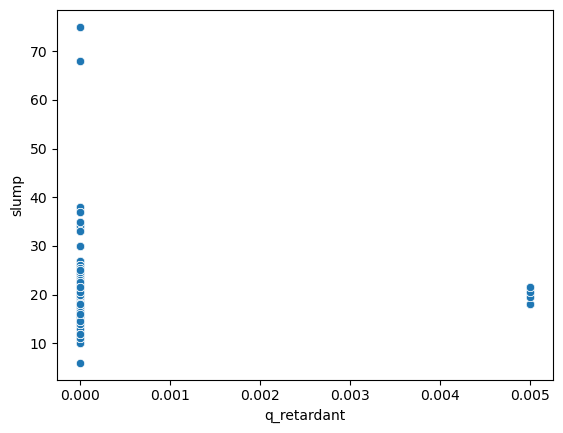

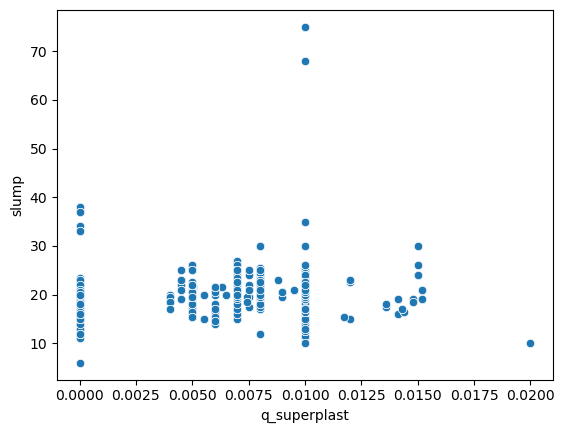

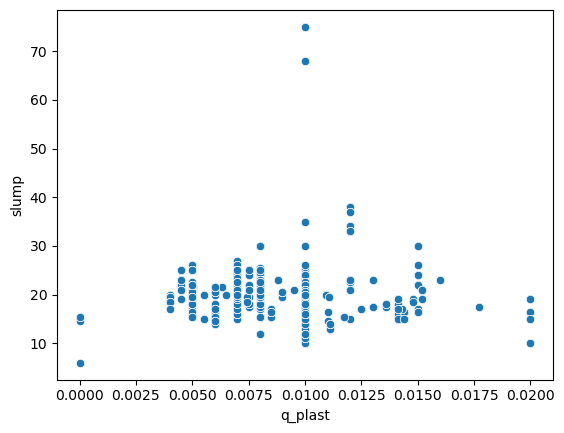

In [4]:
for feature in feature_columns:
    sns.scatterplot(x=feature, y=target_column1, data=df)
    plt.xlabel(feature)
    plt.ylabel('slump')
    plt.show()

In [5]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)

feature_columns1 = selector.fit_transform(feature_columns)
feature_indexes = selector.get_support(indices=True)
#feature_columns = feature_columns.iloc[:, selected_feature_indexes]

#feature_columns_index = pd.DataFrame(feature_columns1,columns=feature_columns.columns)
feature_columns = feature_columns.iloc[:,feature_indexes]
feature_columns

,weight_fresh,weight_at_test,density_fresh,density_at_test,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,id_crushed_sand,id_non_crushed_sand,id_ash,q_stone_1,q_stone_2,q_stone_3,id_stone
5,8030.0,NaN,2362.000906,0.000000,305.0,173.0,16.0,NaN,0.0,819.0,0.0,0.0,53.0,0.0,568.0,0.0,482.0,34.0
11,8050.0,NaN,2367.883847,0.000000,270.0,168.6,60.0,NaN,0.0,821.0,0.0,0.0,53.0,0.0,602.0,0.0,475.0,34.0
17,8160.0,NaN,2400.240024,0.000000,270.0,166.3,60.0,NaN,0.0,684.0,0.0,0.0,53.0,0.0,769.0,0.0,445.0,34.0
23,7840.0,7865.0,2307.579102,2314.937454,225.0,252.8,60.0,NaN,0.0,819.0,75.0,0.0,65.0,31.0,484.0,0.0,595.0,52.0
24,7910.0,7921.0,2326.703259,2329.938876,225.0,252.8,60.0,NaN,0.0,819.0,75.0,0.0,65.0,31.0,484.0,0.0,595.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,NaN,7465.0,0.000000,2219.249350,260.0,170.0,46.0,NaN,660.0,195.0,0.0,25.0,72.0,0.0,445.0,0.0,445.0,NaN
7486,NaN,7450.0,0.000000,2219.227506,260.0,170.0,46.0,NaN,660.0,195.0,0.0,25.0,72.0,0.0,445.0,0.0,445.0,NaN
7487,NaN,7690.0,0.000000,2284.606742,260.0,170.0,46.0,NaN,660.0,195.0,0.0,25.0,72.0,0.0,445.0,0.0,445.0,NaN
7489,NaN,7625.0,0.000000,2248.794867,260.0,170.0,46.0,NaN,660.0,195.0,0.0,25.0,72.0,0.0,445.0,0.0,445.0,NaN


In [6]:
columns_to_drop = ['weight_fresh', 'weight_at_test','density_at_test']
for column in columns_to_drop:
    del feature_columns[column]

['density_fresh', 'q_cement', 'q_water', 'id_cement', 'sand_coarsness', 'q_crushed_sand', 'q_non_crushed_sand', 'q_ash', 'id_crushed_sand', 'id_non_crushed_sand', 'id_ash', 'q_stone_1', 'q_stone_2', 'q_stone_3', 'id_stone', 'slump']


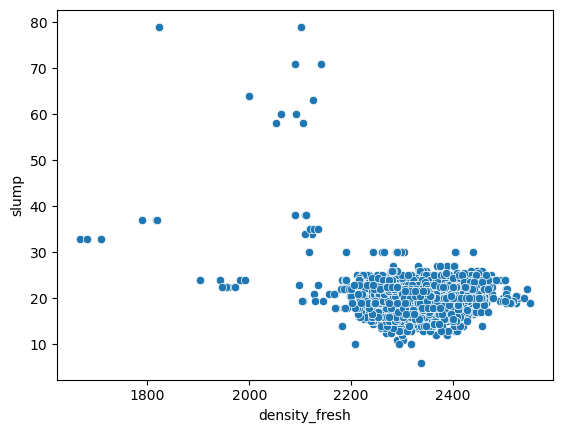

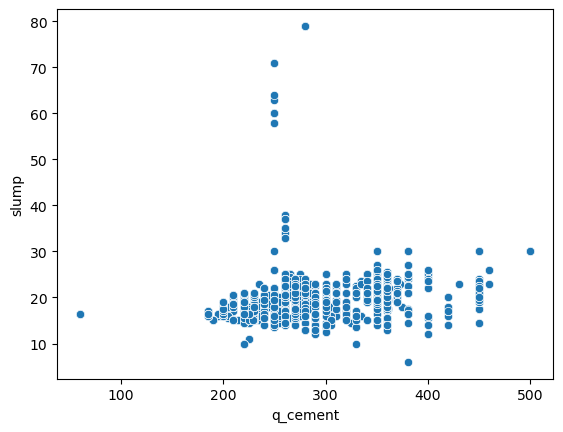

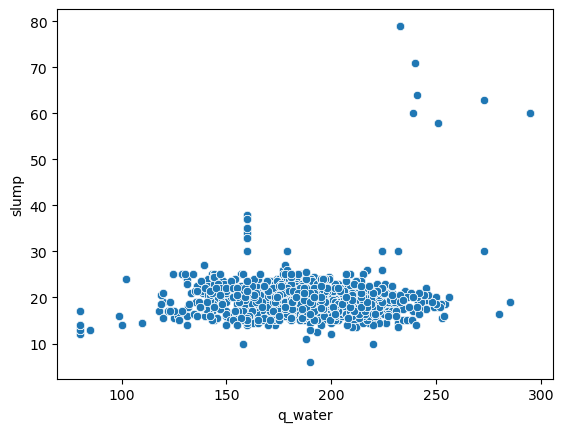

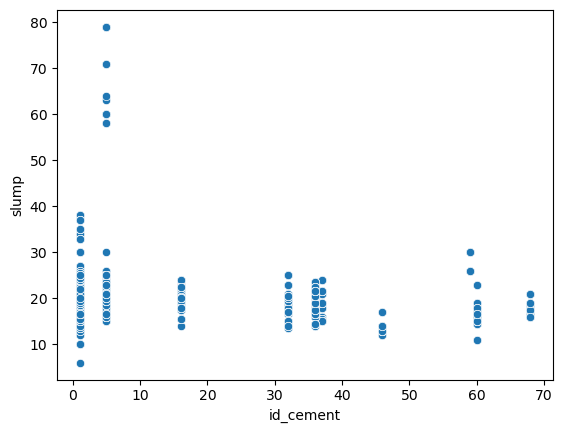

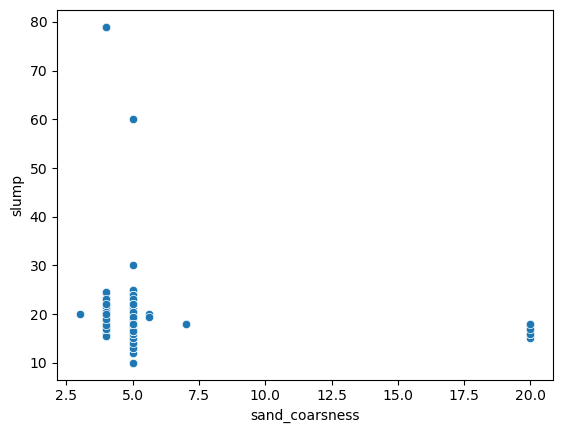

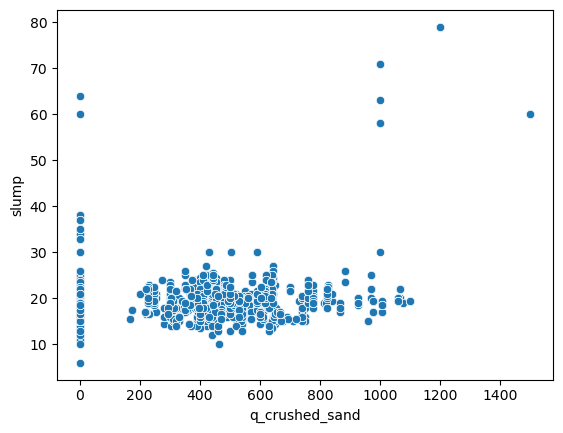

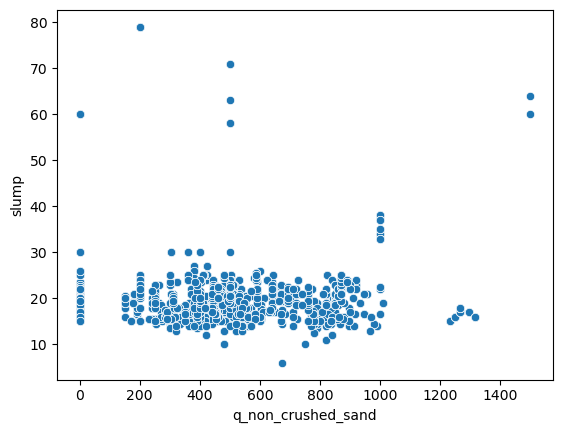

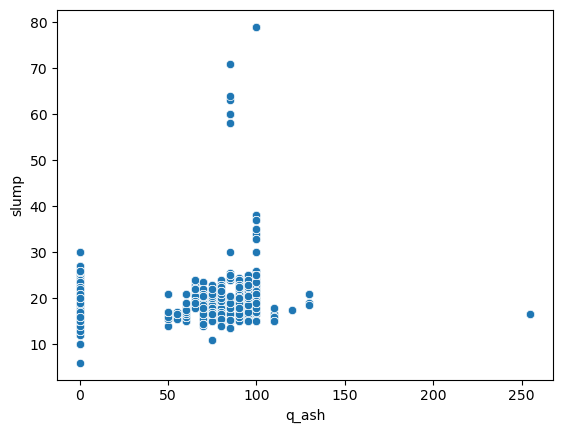

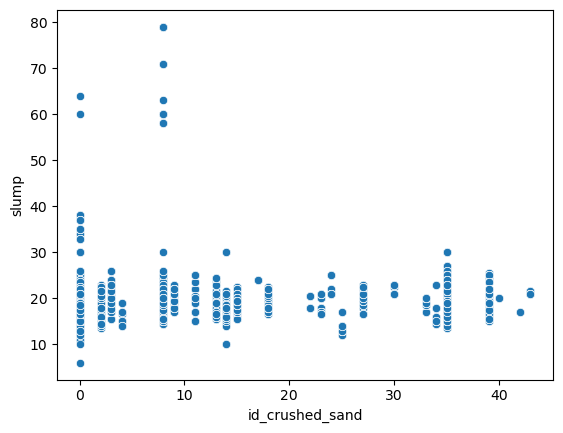

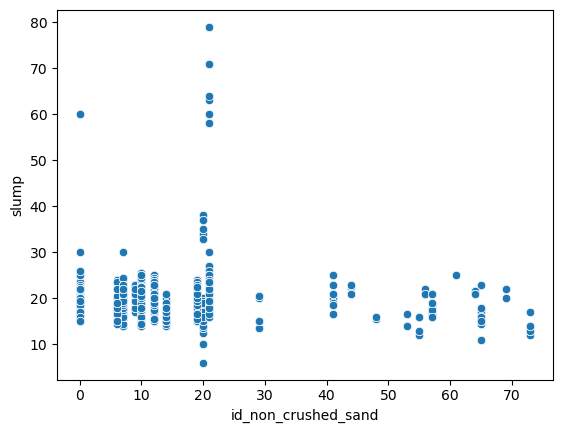

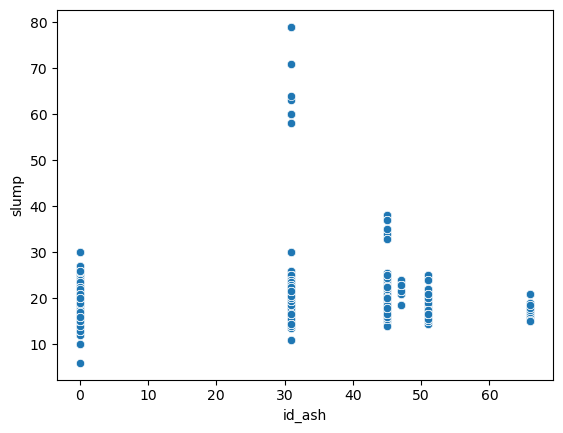

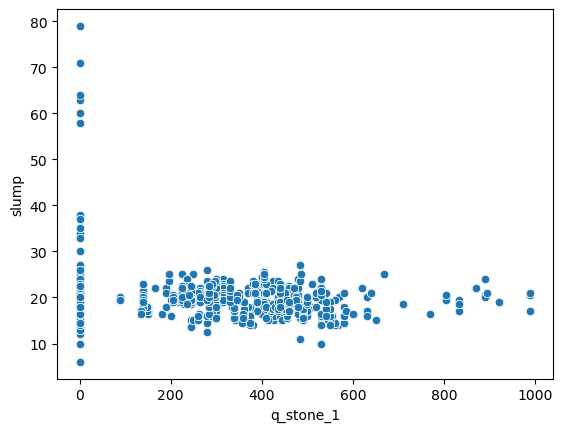

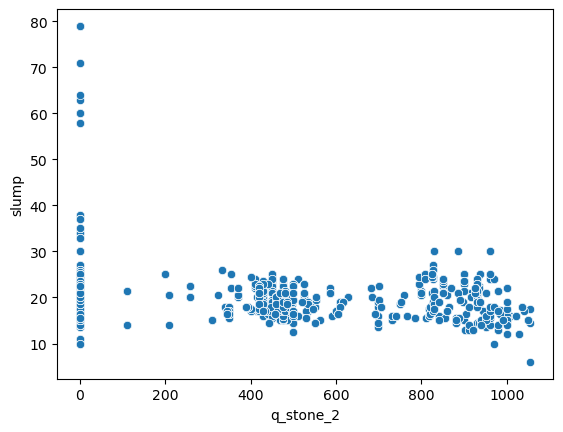

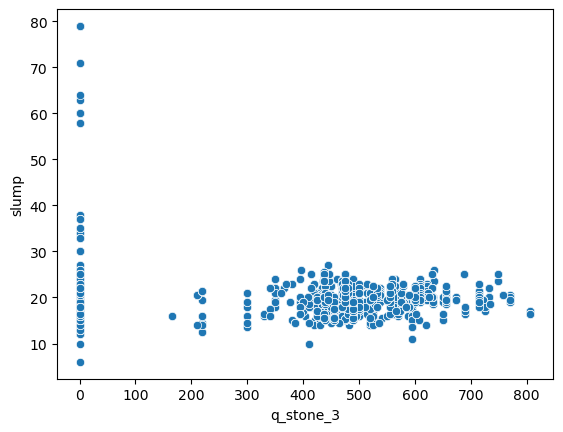

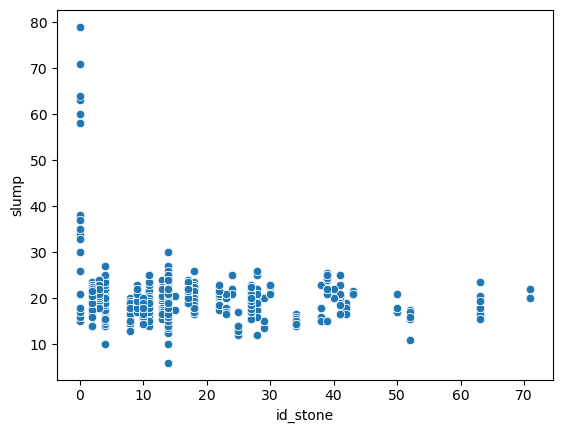

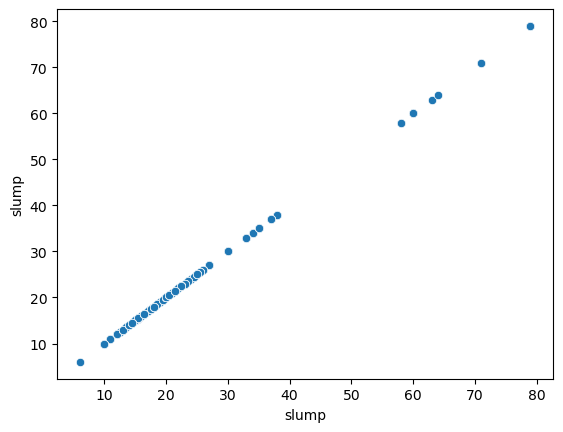

In [7]:
feature_columns = pd.concat([feature_columns,target_column1],axis=1)
feature_columns = feature_columns[(feature_columns['density_fresh'] < 3000) # & (feature_columns['compressive_strength'] > 1)
                                 &(feature_columns['density_fresh'] > 1500) ]

target_column1 = feature_columns['slump']
column_names = feature_columns.columns.tolist()
print(column_names)
######################################################################################################
for feature in feature_columns:
    sns.scatterplot(x=feature, y=target_column1, data=df)
    plt.xlabel(feature)
    plt.ylabel('slump')
    plt.show()

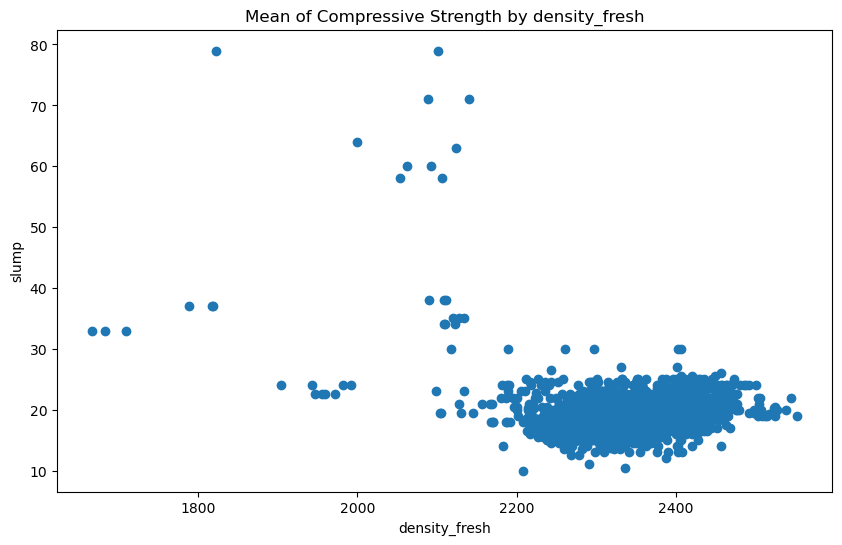

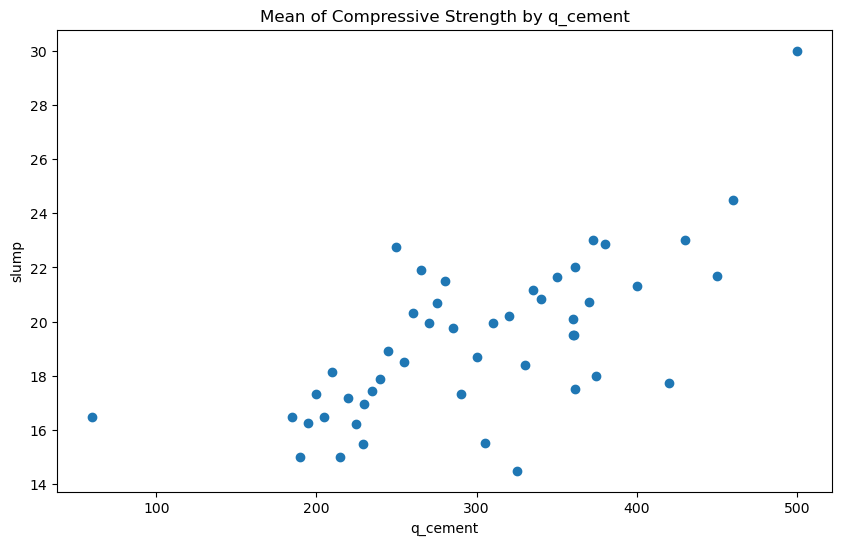

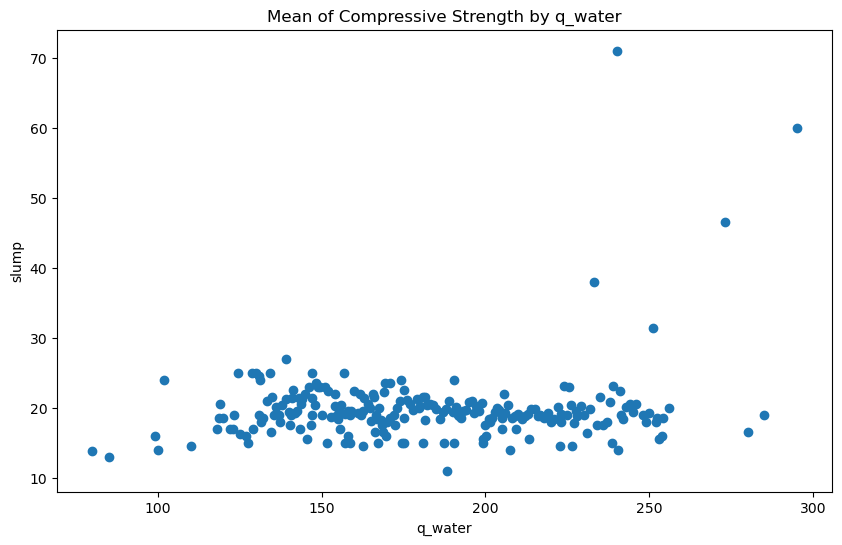

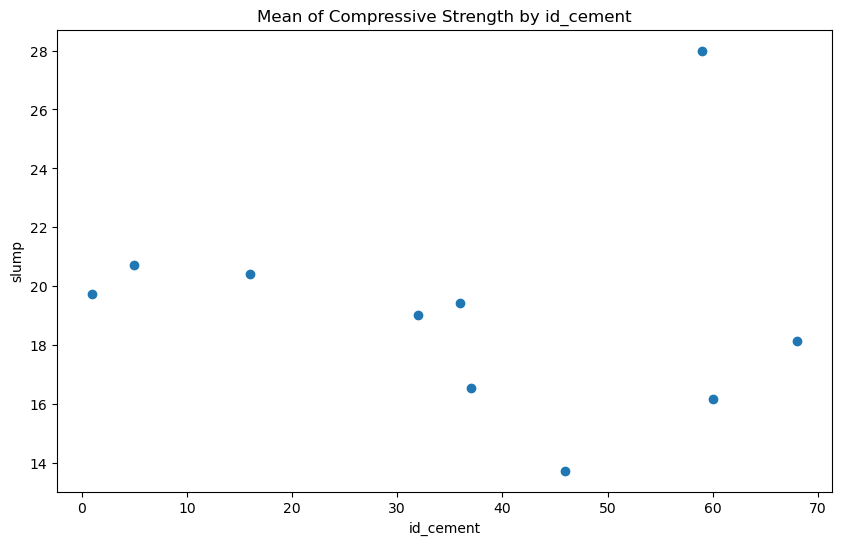

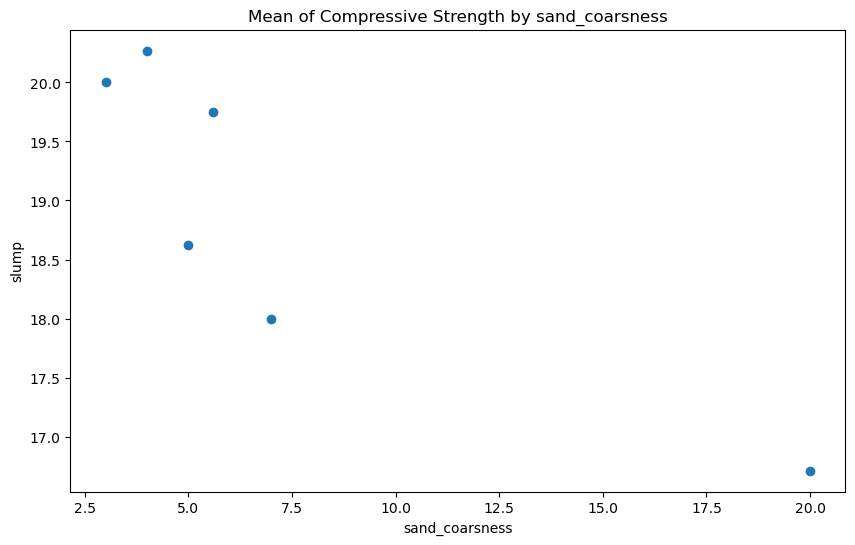

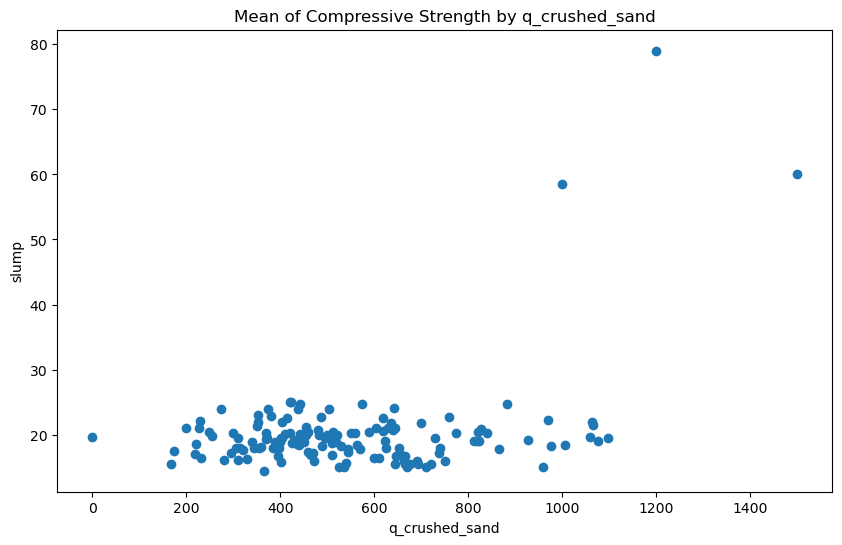

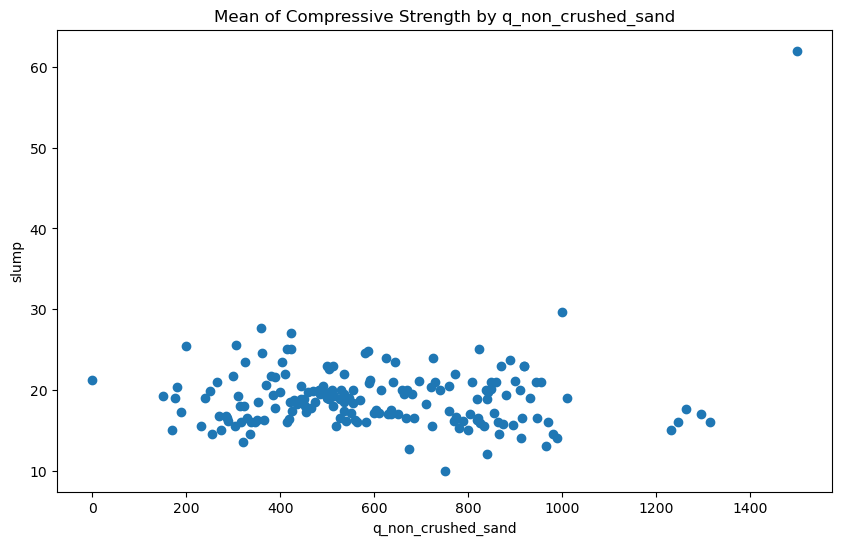

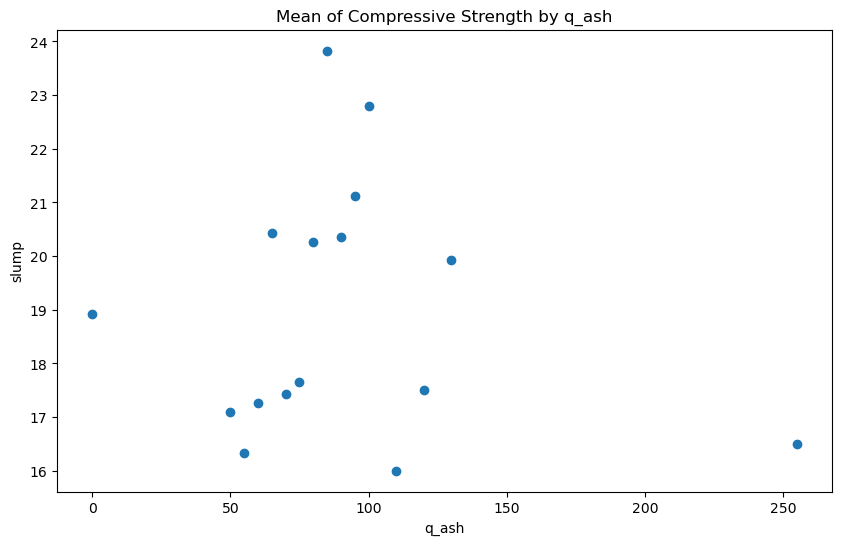

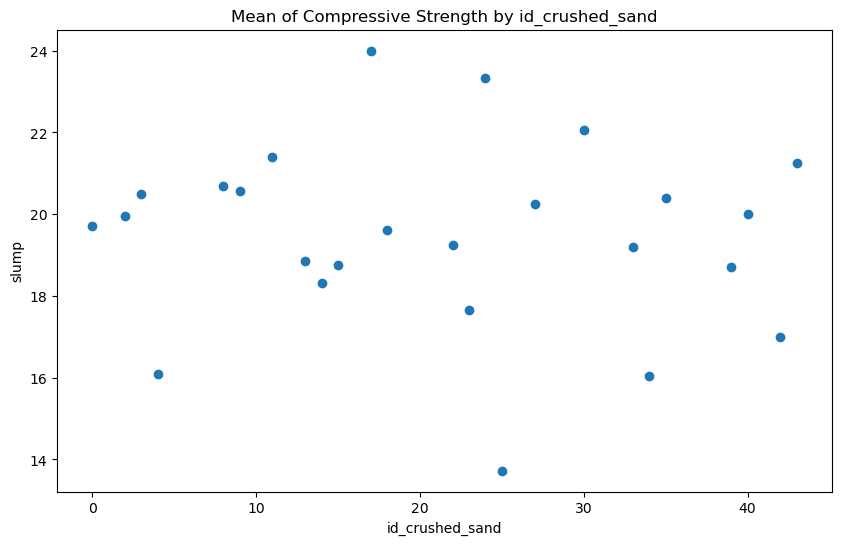

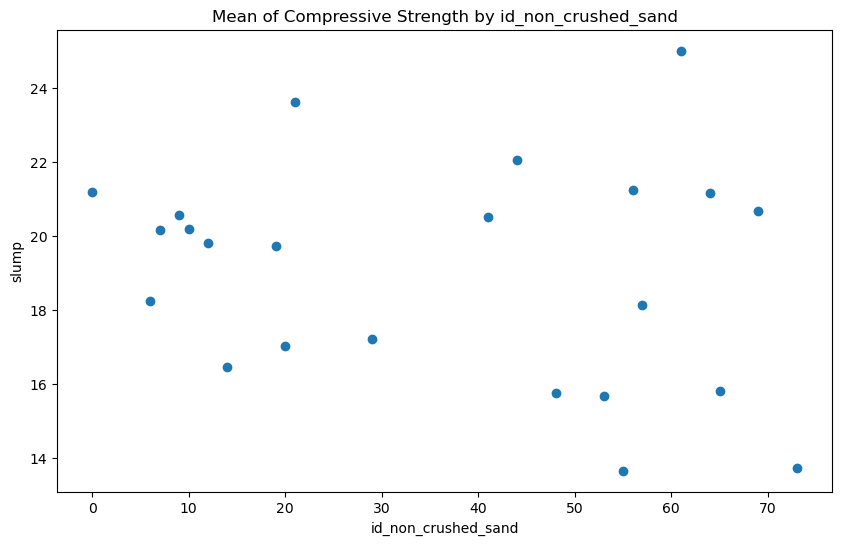

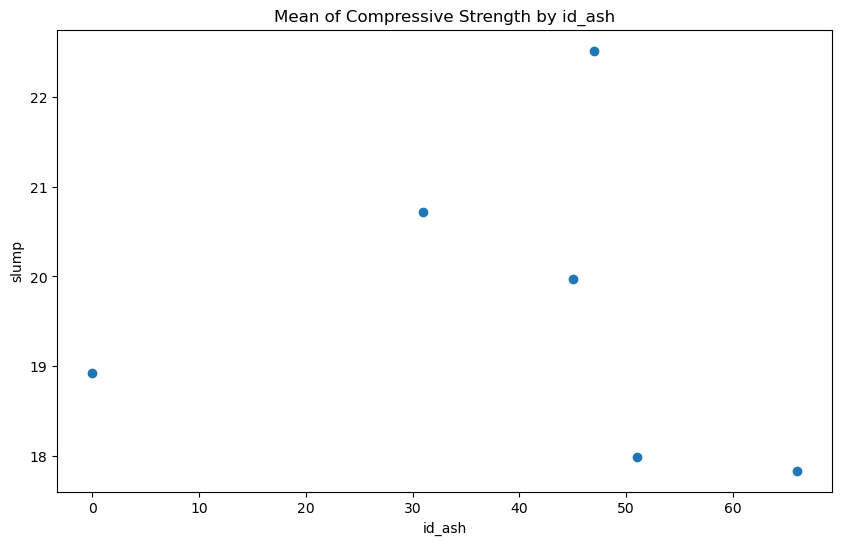

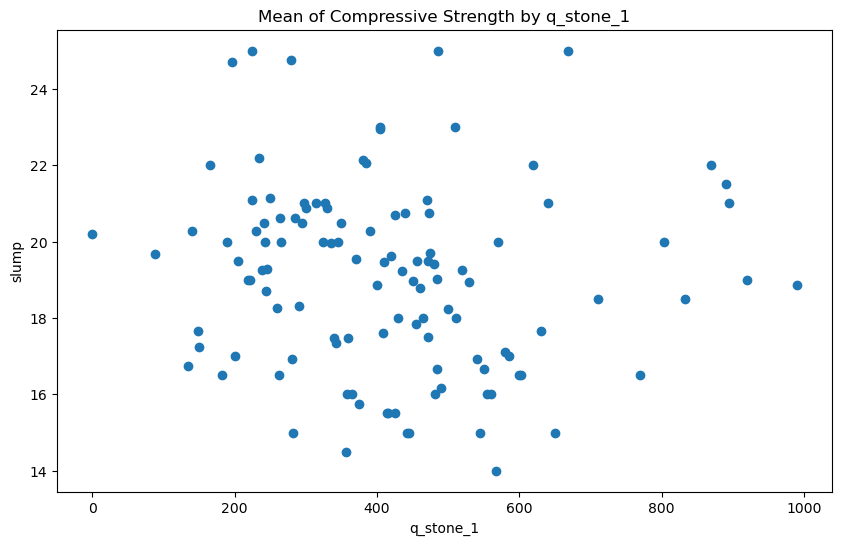

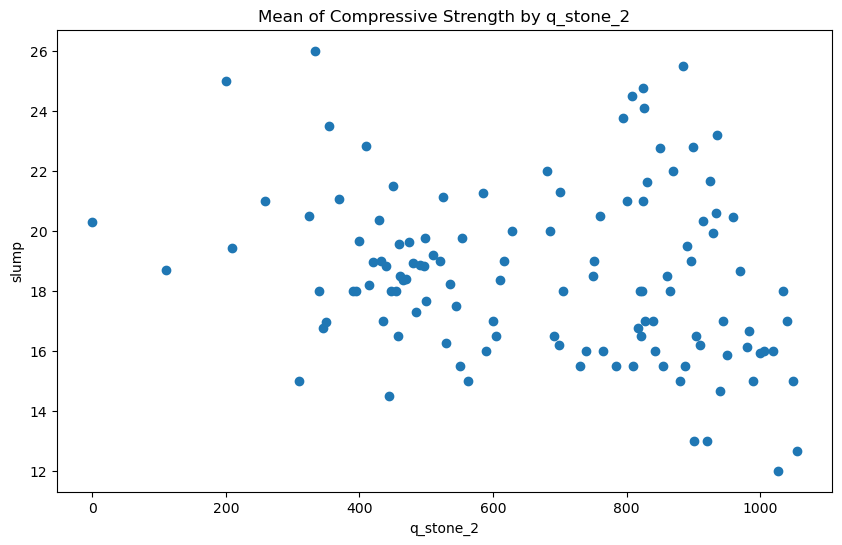

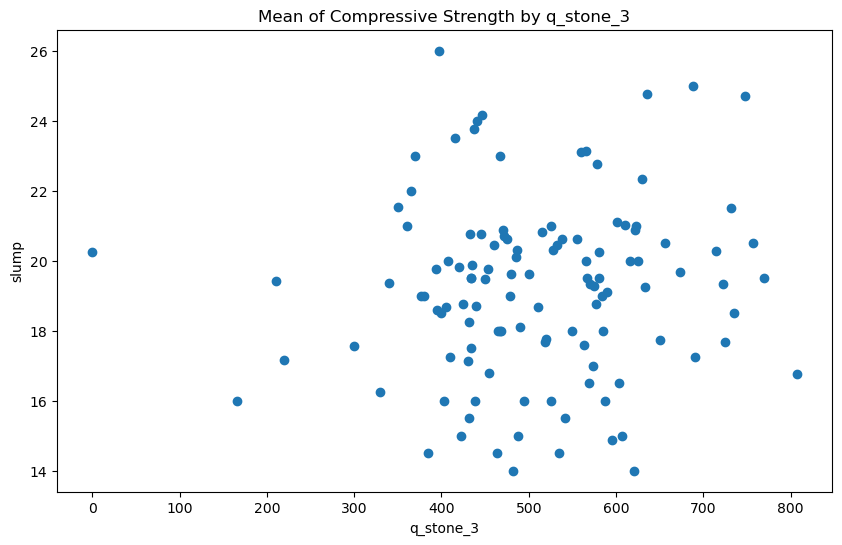

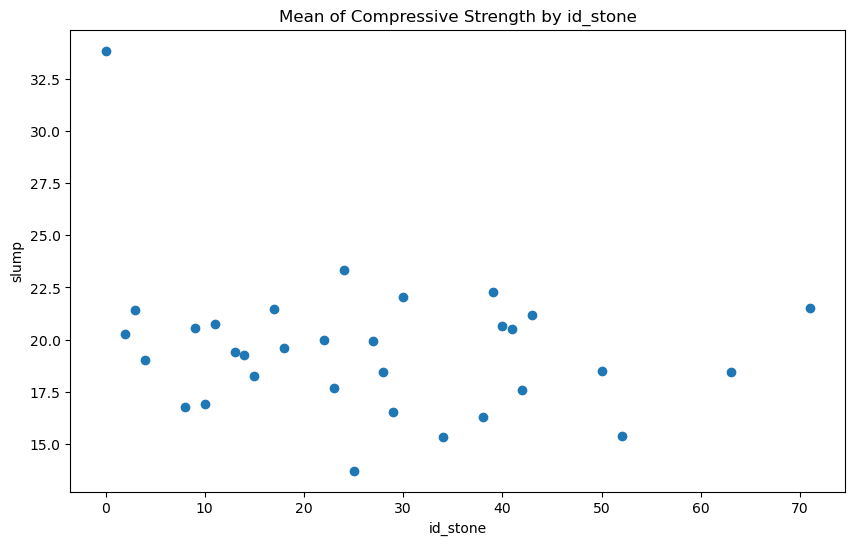

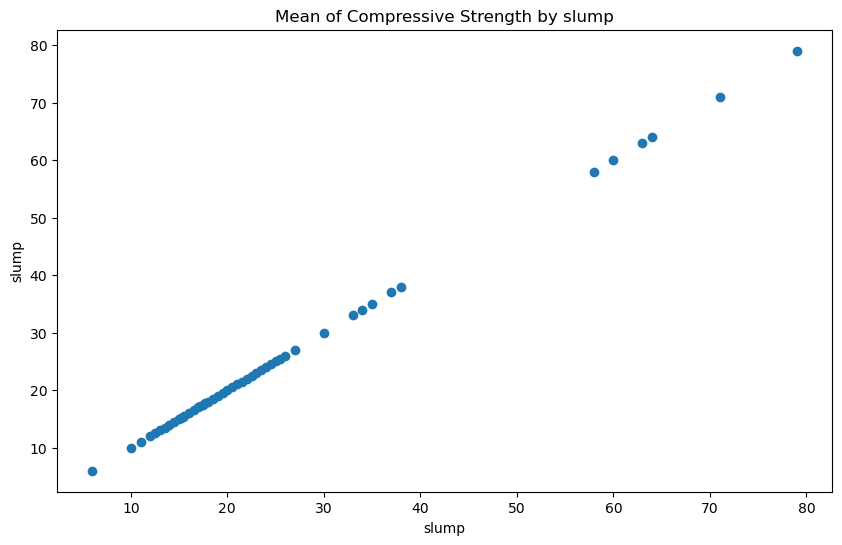

In [8]:
for feature in feature_columns:
    feature_mean = feature_columns.groupby(feature)['slump'].mean()

    plt.figure(figsize=(10, 6))  # 调整图片大小
    plt.scatter(feature_mean.index, feature_mean.values)
    plt.xlabel(feature)
    plt.ylabel('slump')
    plt.title('Mean of Compressive Strength by ' + feature)
    plt.show()

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

feature_columns 

,density_fresh,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,id_crushed_sand,id_non_crushed_sand,id_ash,q_stone_1,q_stone_2,q_stone_3,id_stone,slump
5,2362.000906,305.0,173.00,16.0,NaN,0.00,819.00,0.00,0.0,53.0,0.0,568.00,0.0,482.0,34.0,14.0
11,2367.883847,270.0,168.60,60.0,NaN,0.00,821.00,0.00,0.0,53.0,0.0,602.00,0.0,475.0,34.0,16.5
17,2400.240024,270.0,166.30,60.0,NaN,0.00,684.00,0.00,0.0,53.0,0.0,769.00,0.0,445.0,34.0,16.5
23,2307.579102,225.0,252.80,60.0,NaN,0.00,819.00,75.00,0.0,65.0,31.0,484.00,0.0,595.0,52.0,15.5
24,2326.703259,225.0,252.80,60.0,NaN,0.00,819.00,75.00,0.0,65.0,31.0,484.00,0.0,595.0,52.0,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,2367.407407,265.3,99.60,16.0,NaN,329.60,576.50,70.20,3.0,19.0,31.0,593.90,178.0,178.0,2.0,NaN
7466,2306.666667,218.5,97.25,16.0,5.0,494.25,563.75,78.75,3.0,19.0,31.0,161.25,374.0,374.0,2.0,NaN
7467,2322.962963,218.5,97.25,16.0,5.0,494.25,563.75,78.75,3.0,19.0,31.0,161.25,374.0,374.0,2.0,NaN
7468,2322.147651,218.5,97.25,16.0,NaN,494.25,563.75,78.75,3.0,19.0,31.0,161.25,374.0,374.0,2.0,NaN


In [10]:
nan_columns = feature_columns.columns[feature_columns.isna().any()].tolist()
nan_columns

['sand_coarsness', 'id_ash', 'id_stone', 'slump']

In [11]:
feature_columns['sand_coarsness'].fillna(0, inplace=True)
feature_columns = feature_columns.dropna(axis=0,subset=['id_ash', 'slump','id_stone'])
feature_columns

,density_fresh,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,id_crushed_sand,id_non_crushed_sand,id_ash,q_stone_1,q_stone_2,q_stone_3,id_stone,slump
5,2362.000906,305.0,173.0,16.0,0.0,0.0,819.0,0.0,0.0,53.0,0.0,568.0,0.0,482.0,34.0,14.0
11,2367.883847,270.0,168.6,60.0,0.0,0.0,821.0,0.0,0.0,53.0,0.0,602.0,0.0,475.0,34.0,16.5
17,2400.240024,270.0,166.3,60.0,0.0,0.0,684.0,0.0,0.0,53.0,0.0,769.0,0.0,445.0,34.0,16.5
23,2307.579102,225.0,252.8,60.0,0.0,0.0,819.0,75.0,0.0,65.0,31.0,484.0,0.0,595.0,52.0,15.5
24,2326.703259,225.0,252.8,60.0,0.0,0.0,819.0,75.0,0.0,65.0,31.0,484.0,0.0,595.0,52.0,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2364.444444,260.0,110.0,36.0,0.0,365.0,520.0,70.0,2.0,10.0,31.0,0.0,550.0,385.0,10.0,14.5
7442,2362.962963,260.0,110.0,36.0,0.0,365.0,520.0,70.0,2.0,10.0,31.0,0.0,550.0,385.0,10.0,14.5
7443,2362.962963,260.0,110.0,36.0,0.0,365.0,520.0,70.0,2.0,10.0,31.0,0.0,550.0,385.0,10.0,14.5
7444,2362.962963,260.0,110.0,36.0,0.0,365.0,520.0,70.0,2.0,10.0,31.0,0.0,550.0,385.0,10.0,14.5


In [12]:
X = feature_columns.drop('slump',axis=1)
y = feature_columns['slump']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred

array([19.87876715, 19.87876715, 19.85779467, 19.87876715, 19.87876715,
       19.87876715, 19.87876715, 19.87876715, 19.87876715, 17.5539348 ,
       17.5539348 , 19.85779467, 19.87876715, 17.53296231, 26.09604005,
       19.87876715, 19.87876715, 19.0504533 , 19.87876715, 19.87876715,
       19.87876715, 19.85779467, 19.87876715, 19.87876715, 19.85779467,
       19.85779467, 17.53296231, 19.85779467, 19.85779467, 17.53296231,
       19.85779467, 19.85779467, 19.87876715, 17.53296231, 65.80598464,
       19.87876715, 19.85779467, 19.85779467, 17.5539348 , 19.87876715,
       19.85779467, 17.53296231, 19.87876715, 19.87876715, 19.85779467,
       19.29887296, 19.87876715, 19.85779467, 19.87876715, 19.87876715,
       19.87876715, 19.87876715, 19.87876715, 19.87876715, 19.85779467,
       19.87876715, 19.87876715, 65.80598464, 19.85779467, 19.87876715,
       19.85779467, 19.85779467, 19.87876715, 19.87876715, 17.53296231,
       19.87876715, 19.87876715, 19.85779467, 19.87876715, 29.36

In [14]:
variance = np.var(y_pred - y_test)
variance            #方差坍落度

9.060770478134605

In [15]:
std_deviation = np.std(y_pred - y_test)
std_deviation       #标准差

3.0101113730449587

In [16]:
feature_importances = regr.feature_importances_
names = X_train.columns

# 将特征名称和重要性值对应起来
feature_importances = pd.DataFrame({'Feature': names, 'Importance': feature_importances})

# 按重要性降序排列
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 打印特征重要性
print(feature_importances)

                Feature  Importance
0         density_fresh    0.533602
5        q_crushed_sand    0.165759
2               q_water    0.161898
1              q_cement    0.079724
10               id_ash    0.042794
3             id_cement    0.008289
6    q_non_crushed_sand    0.004510
7                 q_ash    0.002512
9   id_non_crushed_sand    0.000822
4        sand_coarsness    0.000089
8       id_crushed_sand    0.000000
11            q_stone_1    0.000000
12            q_stone_2    0.000000
13            q_stone_3    0.000000
14             id_stone    0.000000


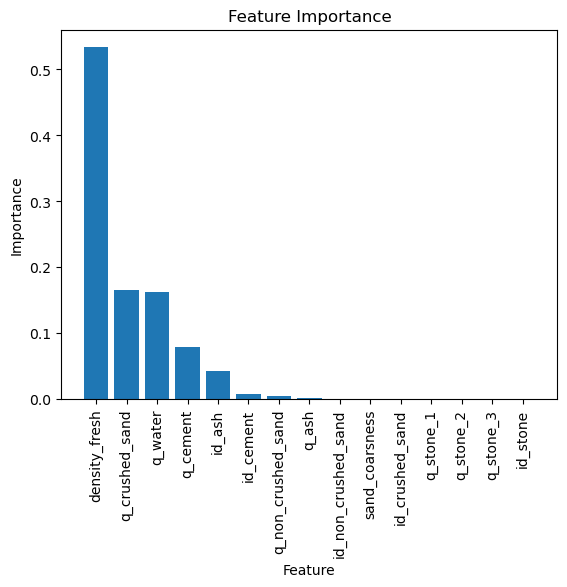

In [17]:
#plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

X1 = feature_columns.drop(['q_cement', 'density_fresh', 'q_water','slump'], axis=1)
y1 = feature_columns['slump']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 定义超参数网格
param_grid = {
    'hidden_layer_sizes': [(10, 10), (20, 20), (30, 30)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [32, 64, 128]
}

# 使用网格搜索进行超参数调优
mlp = MLPRegressor(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(X1_train, y1_train)

# 输出最佳超参数配置
print("最佳超参数：", grid_search.best_params_)

# 使用最佳超参数的模型进行预测
y_pred = grid_search.predict(X1_test)

# 评估模型性能
mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse)

print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-pa

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extma

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: Runtim

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\an

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: Runtim

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\an

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\an

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: Runtim

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: Runtim

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\an

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

最佳超参数： {'activation': 'relu', 'alpha': 0.01, 'batch_size': 128, 'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'adam'}
均方误差 (MSE): 14.519898479793868
均方根误差 (RMSE): 3.810498455555896


C:\anaconda3\envs\learning\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
288 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\envs\learning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 742, in fit
    return self._fit(X, y, incremental=False)
  File "C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 486, in _fit
    raise Val

In [20]:
param_grid = {
    'hidden_layer_sizes': [(40,),(60,), (20,), (30,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0005,0.0008, 0.001, 0.005,0.008,0.0001,0.0002],
    'batch_size': [16, 24, 32,48, 64]
}

grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("最佳超参数：", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarn

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2)

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarn

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: Runtim

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2)

C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2)

C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in sq

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: Runtim

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extma

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarn

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarn

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: Runtim

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarn

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2)

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_p

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduc

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduc

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  re

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encounter

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encounter

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_networ

C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduc

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduc

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduc

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduc

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduc

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encounter

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encounter

C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduc

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encounter

C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduc

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  re

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encounter

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-pack

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encounter

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encounter

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_netw

C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda3\envs\learning\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_base.py:129: RuntimeWarning: invalid value encountered in multiply
  delta *= 1 - Z**2
C:\anaconda3\envs\learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

最佳超参数： {'activation': 'relu', 'alpha': 0.008, 'batch_size': 64, 'hidden_layer_sizes': (60,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
均方误差 (MSE): 9.426357284416923
均方根误差 (RMSE): 3.070237333565098


In [ ]:
'''最佳超参数： {'activation': 'relu', 'alpha': 0.01, 'batch_size': 128, 'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'adam'}
均方误差 (MSE): 14.519898479793868
均方根误差 (RMSE): 3.810498455555896'''

In [ ]:
'''最佳超参数： {'activation': 'relu', 'alpha': 0.008, 'batch_size': 64, 'hidden_layer_sizes': (60,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
均方误差 (MSE): 9.426357284416923
均方根误差 (RMSE): 3.070237333565098'''